In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mdrug = "data/mouse_drug_data.csv"
clin = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mdrug_data = pd.read_csv(mdrug)
clin_data = pd.read_csv(clin)

# Combine the data into a single dataset
merge_df = mdrug_data.merge(clin_data, on = 'Mouse ID')

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = merge_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
mtumor_vol = pd.DataFrame(mean_tumor_vol)
# Preview DataFrame
mtumor_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stumor_vol = merge_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
stumor_vol = pd.DataFrame(stumor_vol)
# Preview DataFrame
stumor_vol.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mtumor_vol = mtumor_vol.unstack(level = 0)
stumor_vol = stumor_vol.unstack(level = 0)
# Preview that Reformatting worked
mtumor_vol.columns = mtumor_vol.columns.get_level_values(1)
stumor_vol.columns = stumor_vol.columns.get_level_values(1)
mtumor_vol.head()
stumor_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


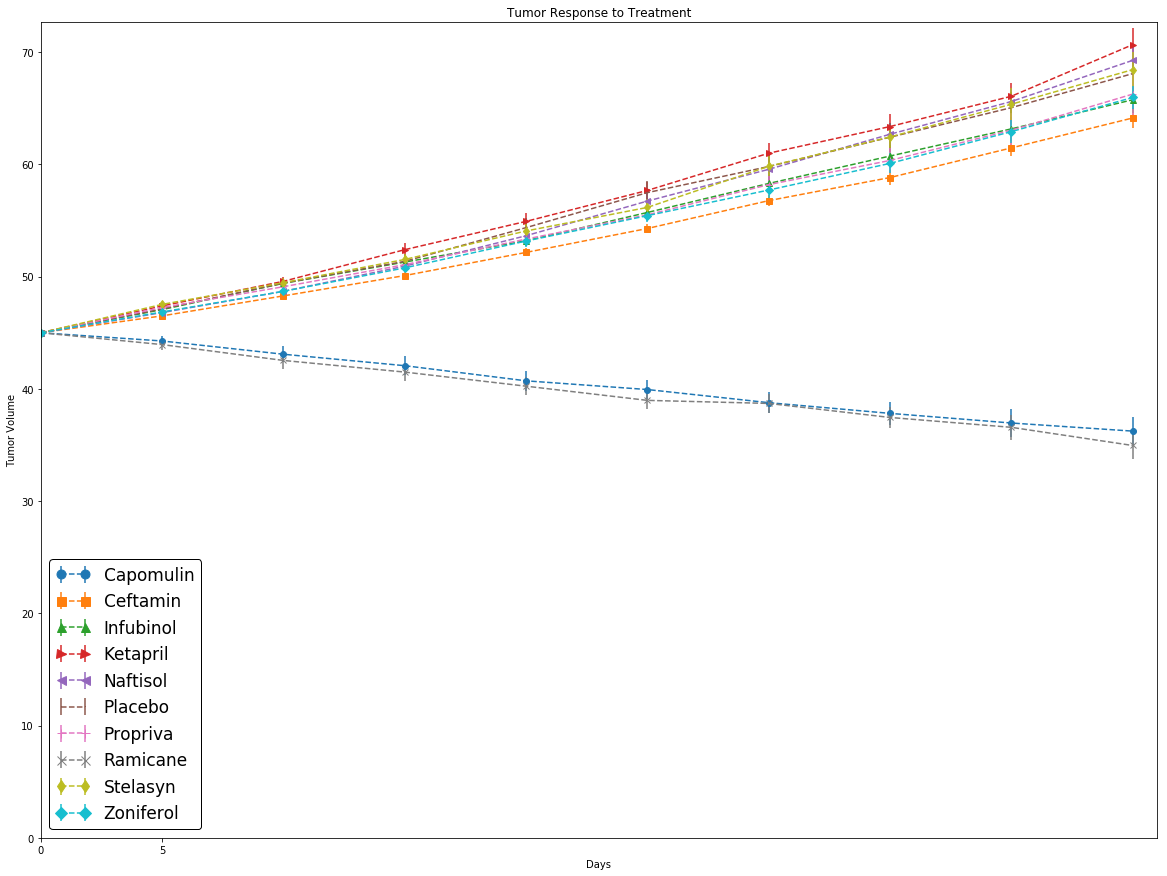

In [5]:
# Generate the Plot (with Error Bars)
plt.figure (figsize = (20,15))
plt.title('Tumor Response to Treatment')
plt.xlabel('Days')
plt.ylabel('Tumor Volume')
plt.xticks(np.arange(0, len(mtumor_vol.index), 5))
plt.xlim(0, mtumor_vol.index.max() + 1)
plt.ylim(0, mtumor_vol.max().max() + stumor_vol.max().max() + .1)
count = 0
x_val = mtumor_vol.index 

markers = ['o', 's', '^', '>', '<', ',', '+', 'x', 'd', 'D']
for x in mtumor_vol:
    plt.errorbar(x_val,
                 mtumor_vol[x], stumor_vol[x], linestyle = '--', marker = markers[count])
    count = count + 1
    
lg = plt.legend(numpoints = 2, # gives two symbols in legend
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)
# Save the Figure
plt.savefig('TumorResponse(1).png')
# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mice_count = merge_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame
mice_mean = pd.DataFrame(mice_count)
mice_mean = mice_mean.unstack(level = 0)
# Preview DataFrame
mice_mean.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mice_sem = merge_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
mice_sem = pd.DataFrame(mice_sem)
mice_sem = mice_sem.unstack(level = 0)
# Preview DataFrame
mice_sem.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

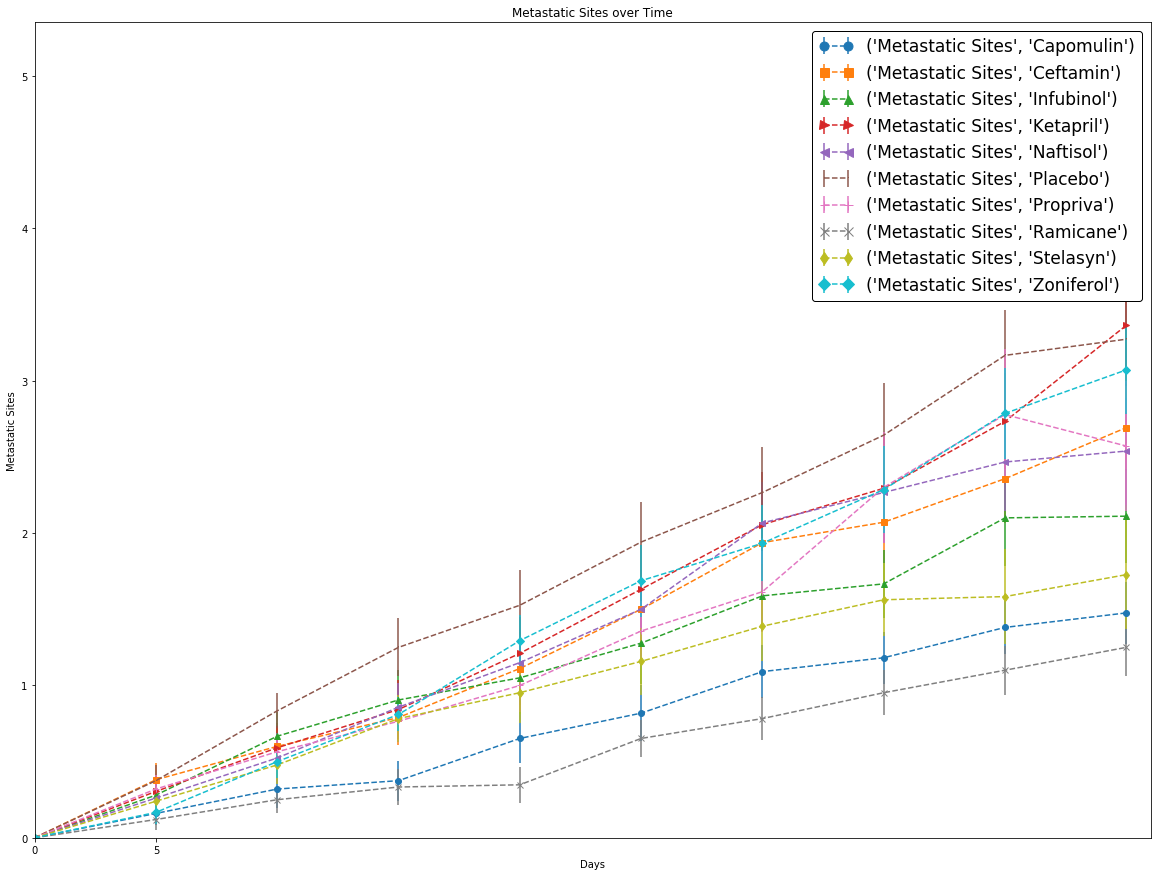

In [8]:
# Generate the Plot (with Error Bars)
plt.figure (figsize = (20,15))
plt.title('Metastatic Sites over Time')
plt.xlabel('Days')
plt.ylabel('Metastatic Sites')
plt.xticks(np.arange(0, len(mice_mean.index), 5))
plt.xlim(0, mice_mean.index.max() + 1)
plt.ylim(0, mice_mean.max().max() + stumor_vol.max().max() + .1)
count = 0
x_val = mice_mean.index 

count = 0 #resetting counter for markers
for x in mice_mean:
    plt.errorbar(x_val,
                 mice_mean[x], mice_sem[x], linestyle = '--', marker = markers[count])
    count = count + 1
    
lg = plt.legend(numpoints = 2, # gives two symbols in legend
                frameon = True, 
                loc = 'best',
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)
# Save the Figure
plt.savefig('MetastaticSites(2).png')
# Show the Figure
plt.show()

## Survival Rates

In [9]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merge_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']

#Data Munging
mice_count = mice_count.unstack(level = 0)

# Preview DataFrame
mice_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


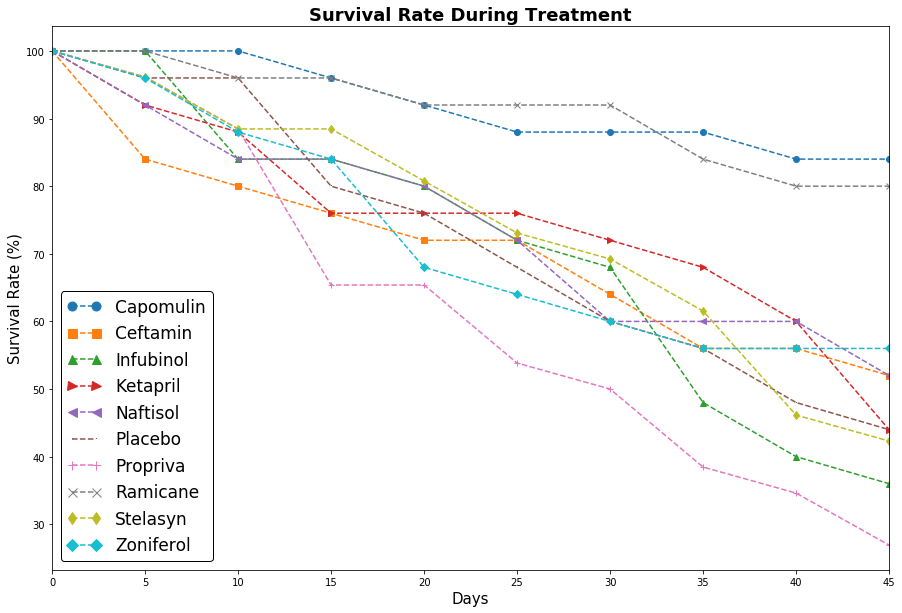

In [10]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (15,10))
plt.title('Survival Rate During Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Survival Rate (%)', fontdict = {'fontsize': 15})
plt.xlim(0, mice_count.index.max())


xvals = mice_count.index #timepoints

count = 0 

for c in mice_count:
    yvals = mice_count[c]/mice_count.loc[0,c] * 100 #calculates survival rate for each timepoint
    plt.plot(xvals, 
             yvals, 
             linestyle = '--', 
             marker =  markers[count], #markers list from above
             )
    count = count + 1
    
lg = plt.legend(numpoints = 2, 
                frameon = True,
                loc = 'best',
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)
# Save the Figure
plt.savefig('SurvivalRate(3).png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [11]:
# Calculate the percent changes for each drug
tumor_change = (mtumor_vol.loc[45, :] - mtumor_vol.loc[0, :])/mtumor_vol.loc[0, :] * 100
# Display the data to confirm
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

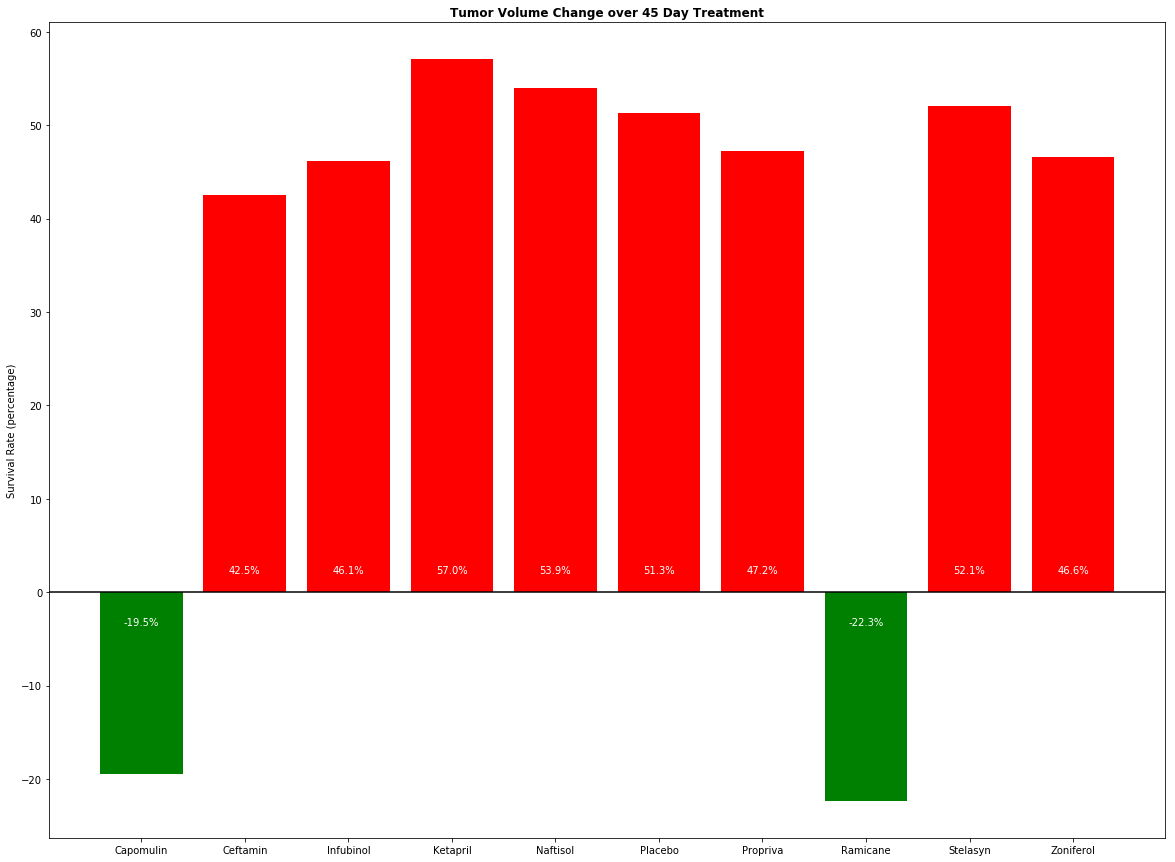

In [12]:
# Store all Relevant Percent Changes into a Tuple
plt.figure(figsize = (20,15))
plt.title('Tumor Volume Change over 45 Day Treatment', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Survival Rate (percentage)')
plt.axhline(y=0, color = 'black') #adds zero line
xlabels = tumor_change.index
#puts drug names as labels
plt.xticks(np.arange(len(xlabels)), xlabels)

#bar graph creation
plt.bar(np.arange(10), 
        tumor_change, 
        # conditional formatting for bars
        color = ['red' if tumor_change[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

#reset counter
count = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for r in tumor_change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1




# Save the Figure
plt.savefig('VolumeChange(4).png')
# Show the Figure
plt.show()